A linear regression learning algorithm example using TensorFlow.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import numpy as np

In [3]:
rng = np.random

Parameters

In [4]:
learning_rate = 0.01
training_epochs = 2000
display_step = 50

Training data

In [5]:
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [6]:
n_samples = train_X.shape[0]

tf Graph input

In [7]:
X = tf.placeholder('float')
Y = tf.placeholder('float')

### Create the model

Set model weights

In [8]:
W = tf.Variable(rng.randn(), name='weight')
b = tf.Variable(rng.randn(), name='bias')

Construct a linear model

In [9]:
activation = tf.add(tf.mul(W, X), b)

Minimize the squared errors (L2 loss)

In [10]:
cost = tf.reduce_sum(tf.div(tf.pow(tf.sub(activation, Y), 2), 2 * n_samples))

Gradient Descent

In [11]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Initializing the variables

In [12]:
init = tf.initialize_all_variables()

Launch the graph

In [13]:
lr_W = None
lr_b = None
lr_cost = np.array([])

with tf.Session() as sess:
    sess.run(init)
    
    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
        
        # Display logs for epoch step
        if epoch % display_step == 0:
            
            lr_cost = np.append(lr_cost, sess.run(cost, feed_dict={X: train_X, Y: train_Y}))
            
            print("Epoch: {:04d} cost={:.9f} W={} b={}".format(epoch + 1,
                                                               sess.run(cost, feed_dict={X: train_X, Y: train_Y}),
                                                               sess.run(W),
                                                               sess.run(b)
                                                              ))
        
    print("Optimization finished!")
    
    lr_W = sess.run(W)
    lr_b = sess.run(b)
    
    print("cost={} W={} b={}".format(sess.run(cost, feed_dict={X: train_X, Y: train_Y}),
                                     sess.run(W),
                                     sess.run(b)
                                    ))
    
    

Epoch: 0001 cost=24.306743622 W=-0.8413726091384888 b=1.133292317390442
Epoch: 0051 cost=0.089598425 W=0.18712009489536285 b=1.2508962154388428
Epoch: 0101 cost=0.088148408 W=0.190836101770401 b=1.22416353225708
Epoch: 0151 cost=0.086865656 W=0.19433057308197021 b=1.19902503490448
Epoch: 0201 cost=0.085730761 W=0.1976168006658554 b=1.1753839254379272
Epoch: 0251 cost=0.084726512 W=0.20070771872997284 b=1.1531480550765991
Epoch: 0301 cost=0.083837844 W=0.2036149650812149 b=1.1322333812713623
Epoch: 0351 cost=0.083051518 W=0.20634931325912476 b=1.1125627756118774
Epoch: 0401 cost=0.082355708 W=0.20892098546028137 b=1.0940625667572021
Epoch: 0451 cost=0.081739977 W=0.21133974194526672 b=1.0766618251800537
Epoch: 0501 cost=0.081195064 W=0.21361488103866577 b=1.0602948665618896
Epoch: 0551 cost=0.080712847 W=0.21575461328029633 b=1.0449016094207764
Epoch: 0601 cost=0.080286130 W=0.21776705980300903 b=1.030423879623413
Epoch: 0651 cost=0.079908431 W=0.21966005861759186 b=1.0168060064315796
E

## Graphic Display

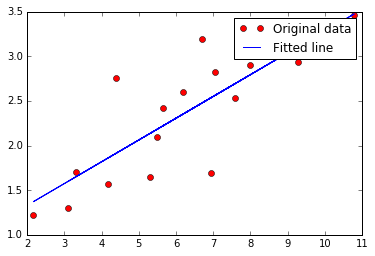

In [23]:
plt.plot(train_X, train_Y, 'ro', label="Original data")
plt.plot(train_X, lr_W * train_X + lr_b, 'b-', label="Fitted line")
plt.legend()

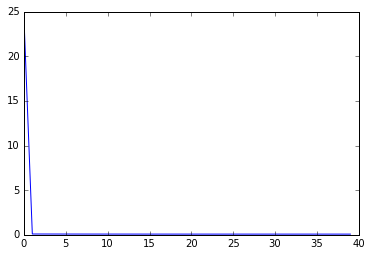

In [25]:
plt.plot(lr_cost, '-')